# <span id="0">Casus *Hidden Markov Model* - Deel I</span>

Inhoud:

* **<a href="#1">CpG-islands (CGIs)</a>**

* **<a href="#2">Hidden Markov Models</a>**

* **<a href="#3">CpG-eiland en non-CpG-eiland sequenties</a>**

* **<a href="#4">Toy-data</a>**

* **<a href="#5">Je eigen `HiddenMarkovModel` class</a>**

In [25]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import numpy as np

<a id="1" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### CpG-islands (CGIs)

CpG-eilandjes zijn elementen in het genoom die een grote invloed uitoefenen op de regulatie van genexpressie door DNA-methylatie. Hun rol in kankerontwikkeling door abnormale methylatie van tumorsuppressorgenen en oncogenen maakt het een doelwit voor diagnostische en therapeutische benaderingen. Begrip van de dynamiek van CpG-eilandjes biedt inzicht in de moleculaire mechanismen van kanker en mogelijkheden voor innovatieve behandelingsstrategieën.

CpG-eilandjes zijn gebieden in het DNA die een hoge dichtheid hebben aan CpG-dinucleotiden, waarbij "CpG" staat voor een cytosine nucleotide (C) gevolgd door een guanine nucleotide (G) verbonden door een fosfaatgroep (p). Deze eilanden zijn meestal ongewoon rijk aan de CG-combinatie en bevatten vaak geen gemethyleerde cytosines, wat hen onderscheidt van de rest van het genoom waar CpG dinucleotiden vaak gemethyleerd zijn en daardoor minder frequent voorkomen. CpG-eilandjes komen vaak voor in of nabij de promotorregio's van genen, die de expressie van de corresponderende genen reguleren. Ze zijn typisch een paar honderd tot een paar duizend basenparen lang en hebben een GC-gehalte van meer dan 50%, met een CpG-dichtheid hoger dan wat gemiddeld is voor het genoom.

CpG-eilandjes spelen een cruciale rol bij de regulatie van genexpressie via hun invloed op DNA-methylatie, een epigenetisch mechanisme. Dit proces voegt een methylgroep toe aan het cytosine-residu in CpG-dinucleotiden, meestal door de werking van DNA-methyltransferasen. In promotorregio's is methylatie vaak geassocieerd met gen-silencing omdat het de binding van transcriptiefactoren en andere noodzakelijke eiwitten voor genexpressie ontmoedigt. Omgekeerd kan het demethyleren van CpG-eilandjes de expressie van geassocieerde genen activeren, aangezien het de toegankelijkheid van transcriptiefactoren en RNA-polymerase vergroot.

<img src="https://media.licdn.com/dms/image/D4D22AQEdqGnu8ZC80Q/feedshare-shrink_2048_1536/0/1684682580953?e=2147483647&v=beta&t=r6jlPalFOi_YDqJ_tBSPkdZRlvfakvmH1DVf9bnTTEk" width="40%" heigth="40%" />

De epigenetische modificatie van CpG-eilandjes speelt een belangrijke rol in kankerontwikkeling door abnormale genexpressie. In kankercellen worden CpG-eilandjes in de promotorregio's van tumorsuppressorgenen vaak hypergemethyleerd. Dit leidt tot silencing van deze genen, wat bijdraagt aan ongecontroleerde celgroei en proliferatie. Voorbeelden van tumorsuppressorgenen die vaak gehypermethyleerd zijn in kanker omvatten *p16INK4a* en *BRCA1*. Globale hypomethylatie van het genoom kan ook voorkomen in kankercellen, wat resulteert in genomische instabiliteit en de activatie van oncogenen. Dit draagt bij aan tumorvorming en -progressie.

Abnormale methylatiepatronen van CpG-eilandjes kunnen dienen als biomarkers voor de vroege detectie en diagnose van kanker. Epigenetische therapieën, zoals DNA-methylatie-inhibitoren (bijv. azacitidine en decitabine), worden gebruikt om abnormale methylatie om te keren en de normale expressie van tumorsuppressorgenen te herstellen.

Bekijk onderstaande inleidende video en schrijf er een samenvatting van. Zoek zo nodig zelf uitgebreidere achtergrondinformatie over onbekende onderwerpen en vermeld deze bronnen in je samenvatting als referenties. Neem onder andere de bijbehorende [Wikipedia](https://en.wikipedia.org/wiki/CpG_site) pagina door.

In [26]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/bc3wtVXyAXo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## *CpG eilanden - Samenvatting video*
CpG sites, zijn regio’s waar er (in de 5’ - 3’ richting) na een C, een G volgt. Als alle nucleotiden even vaak voor zouden komen, in een willekeurige volgorde zou een tweetal nucleotiden in 6.25% een CPG site zijn. Bij mensen is het echter maar 1%.
Het proces van deaminatie kan ervoor zorgen dat een C een U wordt, als de C gemethyleerd is kan deze in een T veranderen. Een U komt alleen RNA voor, en valt hierdoor erg op, een foutieve T is echter moeilijker te detecteren. In organismen met geen of minder methylering is het CG% wel de verwachte 6.25%. In gewervelde organismen wordt een C eerder gemethyleerd als deze door een G wordt gevolgd.

Regio’s met een relatief hoog CG% worden CpG eilanden genoemd. Deze worden meestal gedefinieerd met de volgende eisen: minimaal 200 bp lang, boven 50% CG%, en hebben een O/E CpG ratio van boven 60%. CpG eilanden zijn meestal niet gemethyleerd. Deze regio’s hebben over het algemeen een veel hogere expressie, waardoor ze niet gemethyleerd raken.

Hypermethylering van CpG eilanden in promoter regio’s is 10x vaker de oorzaak van kanker dan mutaties.


<a id="2" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Hidden Markov Models

CpG-eilandjes kunnen worden gedetecteerd met behulp van verschillende computationele methoden, waarvan een van de meest effectieve methoden het gebruik van Hidden Markov Models (HMMs) is.

Een Hidden Markov Model is een krachtig hulpmiddel voor het modelleren van tijdreeksen en sequentiële data waarin de werkelijke toestanden niet direct zichtbaar zijn, maar waar de uitkomsten afhankelijk zijn van deze toestanden. HMMs maken gebruik van probabilistische berekeningen om te schatten welke verborgen toestanden het meest waarschijnlijk zijn gegeven de waargenomen data, wat ze tot een waardevol instrument maakt in een breed scala aan toepassingen. HMMs worden breed toegepast in verschillende domeinen van de bioinformatica, maar ook bijvoorbeeld in spraakherkenning en natuurlijke taalverwerking of financiële modellering van markttendensen.

Hidden Markov Models zijn zeer geschikt voor de detectie van CpG-eilandjes vanwege hun vermogen om sequenties te modelleren en patronen te herkennen in biologische data. In het kader van CpG-eilandjes vormen de verschillende nucleotiden in het DNA de waargenomen data, en is de aanwezigheid van een CpG-eiland, al dan niet, de verborgen toestand. Door het toepassen van HMMs kunnen wetenschappers efficiënt de locatie van CpG-eilandjes bepalen, wat waardevolle inzichten biedt in genregulatie en kankeronderzoek.

<img src="https://www.researchgate.net/profile/Tomer-Toledo/publication/245563174/figure/fig1/AS:669081116094471@1536532777801/State-transition-diagram-of-a-hidden-Markov-model.png" width="40%" height="40%" />

Een HMM wordt gekarakteriseerd door de volgende eigenschappen:

* **Toestanden / States** Een gegeven aantal verschillende verborgen interne toestanden waarin een geobserveerd systeem zich kan bevinden. In de context van CpG-eilandjesdetectie kunnen de toestanden bijvoorbeeld "in een CpG-eiland" en "buiten een CpG-eiland" zijn.

* **Overgangswaarschijnlijkheden / Transition probabilities** De kans dat het systeem van de ene toestand naar de andere overgaat. Bijvoorbeeld, de kansen om van "buiten een CpG-eiland" naar "in een CpG-eiland" te veranderen, en omgekeerd, of de kansen om binnen dezelfde toestand te blijven.

* **Emissiekansen / Emission probabilities** De kans om een bepaalde uitkomst te observeren vanuit een gegeven toestand. Voor CpG-eilandjes zijn dit de kansen van het voorkomen van verschillende nucleotiden (A, T, C, G) zowel in als buiten de eilandjes.

* **Begintoestandsverdeling / Start probabilities** De initiële waarschijnlijkheden dat het systeem dat zich in een bepaalde toestand bevindt. Een DNA-sequentie kan met zekere kans beginnen met een CpG-eilandje, of niet.

Een HMM maakt, net als elk model, diverse aannamen die de analyse van gegevens vereenvoudigen. De belangrijkste aannamen van een HMM zijn dat (1) het waargenomen systeem zich alléén in een discreet (d.w.z. eindig) aantal verschillende toestanden kan bevinden die variëren in de loop van de reeks, (2) dat de waarnemingen die aan het systeem gedaan worden alléén afhangen van de huidige toestand van het systeem, en (3) dat de kansverdeling omtrent wat de toestand van het systeem op een volgend moment gaat zijn alléén afhangt van wat de toestand van het systeem op een voorgaand moment was.

De toestand van het systeem is zelf niet rechtstreeks waarneembaar; wel waarneembaar zijn de emissies die afhangen van de toestand. De meestgestelde vraag die een HMM kan proberen te beantwoorden is: "gegeven een serie waarnemingen, wat waren de meest waarschijnlijke onderliggende toestanden van het systeem"? Bijvoorbeeld, in ons geval: "gegeven een nucleotidesequentie, welke delen vallen in een CpG-eiland en welke vallen erbuiten"?

Bekijk onderstaande inleidende video en schrijf er een samenvatting van. Zoek zo nodig zelf uitgebreidere achtergrondinformatie over onbekende onderwerpen en vermeld deze bronnen in je samenvatting als referenties. Neem onder andere de bijbehorende [Wikipedia](https://en.wikipedia.org/wiki/Hidden_Markov_model) pagina door.

In [27]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/fX5bYmnHqqE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## *Hidden markov model*
Benodigd voor het gebruik van dit model zijn er observeerbare toestanden, observe states, nodig. En de observeerbare toestanden hebben een bekendk effect op een verborgen toestand, hidden state.

Met behulpt van probabilitische toestanden te berekenen. Om te kunnen schatten welke verborgen toestanden het meest waarschijnlijk zijn.

### transitions probability, hidden states
De kans dat een hidden state naar een andere hidde state gaat. Deze toestanden zijn verborgen en niet waarneembaar. Maar wel toekenbaar. Hier is ook een start probabiltie aanwezig. dus de kans dat het van de start toeststand naar de andere hidden states gaat.

### emision probability, observe states
De kans dat de hidden state zich uit met de kansen voor de observe states. Deze toestanden zijn dus wel waarneembaar en dus de aanwezigheid van de observe states heeft een kans dat het de hidden state beinvloed.

Dus de hidden states hebben een effect op de observe states, dit kan je buitenaf niet direct zien.

### the model
In het model wordt de hidden state bepaalt met de data dat de observed states bevat. De kans voor de volgende hidden state wordt alleen maar bepaalt met de laatste hidden state.

De kans wordt berekend met behulp van de maximum likelyhood estimation
maximize the probability the different variables occuring together. 
En schatting maken met de combinatie van de hidden states gebasseerd op de gegeven data van de observed states. 

Wordt gebruikt in natural language processing, elk word is een observed state en welke taal vorm het kan zijn is de hidden state.


<a id="3" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### CpG-eiland en non-CpG-eiland sequenties

De onderstaande tabellen geven de experimentele waarschijnlijkheden aan dat een zekere nucleotide (in de rijen) gevolg wordt door een zekere andere nucleotide (in de kolommen) binnen en buiten CpG-eilanden.

Bron: "Biological sequence analysis - Probabilistic models of proteins and nucleic acids", Durbin et al. (1998), hoofdstuk 3, p50-51 ([ref](http://www.mcb111.org/w06/durbin_book.pdf)).

*CGI* (`+`)

|  `+`  |   A   |   C   |   G   |   T   |
| :---: | :---: | :---: | :---: | :---: |
| **A** | 0.180 | 0.274 | 0.426 | 0.120 |
| **C** | 0.171 | 0.368 | 0.274 | 0.188 |
| **G** | 0.161 | 0.339 | 0.375 | 0.125 |
| **T** | 0.079 | 0.355 | 0.384 | 0.182 |

*non-CGI* (`-`)

|  `-`  |   A   |   C   |   G   |   T   |
| :---: | :---: | :---: | :---: | :---: |
| **A** | 0.300 | 0.205 | 0.285 | 0.210 |
| **C** | 0.322 | 0.298 | 0.078 | 0.302 |
| **G** | 0.248 | 0.246 | 0.298 | 0.208 |
| **T** | 0.177 | 0.239 | 0.292 | 0.292 |

Bijvoorbeeld, de kans dat een gegeven C gevolgd wordt door een G is slechts 7.8 % buiten een CpG-eilandje, maar neemt toe tot maar liefst 27.4 % binnen een CpG-eilandje, hetgeen benadrukt hoe sterk CpG-dinucleotiden relatief oververtegenwoordigd zijn binnen CpG-eilandjes. Ga na dat de som van de kansen in elke rij van de tabel moet sommeren tot 100% (op afrondfouten na).

Genereer met python-code een willekeurige sequentie van 300 baseparen lengte overeenkomend met een CpG-eiland en een soortgelijke sequentie van een non-CpG-eiland. Kies telkens het eerste nucleotide willekeurig, en gebruik dan de bovenstaande overgangswaarschijnlijkheden om de sequentie te verlengen. Bepaal van de gegenereerde complete sequenties de kansen op elk nucleotide ($P_A, P_C, P_G, P_T$) evenals de kansen op elk dinucleotide ($P_{AA}, P_{AC}, \ldots, P_{TT}$). Bepaal voor elk dinucleotide ook de ratios $r$ tussen de waargenomen en de verwachte kans, zoals

$$
r_{AC} = \frac{P_{AC}}{P_A \cdot P_C}
$$

Wat kun je verhoudingsgewijs zeggen over hoe vaak C en G afzonderlijk voorkomen, en hoe vaak het CpG-dinucleotide voorkomt? Welke combinaties van nucleotiden zijn het sterkst over- of ondergerepresenteerd?

In [28]:
import random

nucleotides = ['A', 'C', 'T', 'G']

def sequence_appender(nucleotides,sequence = [random.choice(nucleotides)]): #sequence = [random.choice(nucleotides)] zorgt er voor dat beide prints hetzelfde returnen, dit wiped sequence
    if len(sequence) == 300:
        return sequence
    
    if sequence[-1] == 'A':
        sequence += random.choices(
        nucleotides, (0.300, 0.205, 0.285, 0.210), k=1)
    elif sequence[-1] == 'C':
        sequence += random.choices(
        nucleotides, (0.322, 0.298, 0.078, 0.302), k=1)
    elif sequence[-1] == 'G':
        sequence += random.choices(
        nucleotides, (0.248, 0.246, 0.298, 0.208), k=1)
    elif sequence[-1] == 'G':
        sequence += random.choices(
        nucleotides, (0.177, 0.239, 0.292, 0.292), k=1)
    else:
        sequence += random.choice(nucleotides)
    return sequence_appender(nucleotides,sequence)

sequence_inside_CpG = sequence_appender(nucleotides)
print(sequence_inside_CpG)

['C', 'G', 'A', 'A', 'T', 'A', 'C', 'C', 'A', 'A', 'A', 'G', 'T', 'G', 'T', 'T', 'T', 'T', 'G', 'A', 'T', 'T', 'G', 'C', 'C', 'T', 'T', 'C', 'A', 'C', 'G', 'A', 'T', 'T', 'C', 'A', 'G', 'G', 'C', 'A', 'A', 'A', 'C', 'G', 'T', 'T', 'A', 'T', 'G', 'G', 'G', 'C', 'G', 'T', 'G', 'T', 'A', 'A', 'A', 'A', 'A', 'G', 'A', 'A', 'A', 'A', 'A', 'G', 'A', 'T', 'C', 'C', 'C', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'G', 'T', 'C', 'A', 'T', 'C', 'G', 'C', 'C', 'G', 'T', 'T', 'T', 'A', 'C', 'C', 'C', 'T', 'A', 'T', 'T', 'A', 'A', 'A', 'A', 'G', 'G', 'G', 'C', 'G', 'G', 'C', 'C', 'G', 'C', 'T', 'T', 'G', 'C', 'G', 'T', 'C', 'A', 'T', 'T', 'C', 'C', 'G', 'T', 'T', 'G', 'A', 'T', 'T', 'T', 'C', 'A', 'T', 'G', 'A', 'T', 'C', 'A', 'C', 'C', 'G', 'T', 'G', 'T', 'A', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'C', 'A', 'C', 'G', 'T', 'A', 'T', 'T', 'C', 'C', 'A', 'T', 'C', 'G', 'A', 'A', 'G', 'G', 'G', 'A', 'G', 'C', 'G', 'T', 'T', 'A', 'A', 'T', 'A', 'A', 'A', 'T', 'G', 'A', 'C', 'G', 'G', 'C', 'G', 'C', 'G',

In [29]:
def sequence_appender(nucleotides,sequence = [random.choice(nucleotides)]): #sequence = [random.choice(nucleotides)] zorgt er voor dat beide prints hetzelfde returnen, dit wiped sequence
    if len(sequence) == 300:
        return sequence

    if sequence[-1] == 'A':
        sequence += random.choices(
        nucleotides, (0.180, 0.274, 0.426, 0.120), k=1)
    elif sequence[-1] == 'C':
        sequence += random.choices(
        nucleotides, (0.171, 0.368, 0.274, 0.188), k=1)
    elif sequence[-1] == 'G':
        sequence += random.choices(
        nucleotides, (0.161, 0.339, 0.375, 0.125), k=1)
    elif sequence[-1] == 'G':
        sequence += random.choices(
        nucleotides, (0.079, 0.355, 0.384, 0.182), k=1)
    else:
        sequence += random.choice(nucleotides)
    return sequence_appender(nucleotides,sequence)

sequence_outside_CpG = sequence_appender(nucleotides)
print(sequence_outside_CpG)

['T', 'G', 'C', 'T', 'G', 'C', 'C', 'C', 'T', 'G', 'A', 'C', 'T', 'C', 'A', 'C', 'A', 'A', 'T', 'A', 'T', 'C', 'T', 'A', 'A', 'T', 'T', 'T', 'C', 'T', 'T', 'C', 'C', 'G', 'T', 'G', 'G', 'T', 'C', 'A', 'T', 'A', 'A', 'T', 'A', 'A', 'T', 'G', 'T', 'T', 'T', 'G', 'A', 'T', 'C', 'A', 'C', 'T', 'A', 'C', 'C', 'T', 'A', 'A', 'T', 'C', 'A', 'C', 'G', 'C', 'T', 'T', 'T', 'C', 'T', 'C', 'G', 'C', 'C', 'T', 'G', 'A', 'T', 'G', 'T', 'T', 'T', 'A', 'T', 'T', 'G', 'A', 'T', 'G', 'G', 'G', 'T', 'C', 'C', 'A', 'T', 'T', 'C', 'T', 'C', 'C', 'T', 'T', 'A', 'G', 'T', 'C', 'T', 'G', 'A', 'C', 'C', 'T', 'C', 'T', 'A', 'T', 'A', 'C', 'T', 'A', 'T', 'C', 'A', 'T', 'A', 'C', 'T', 'C', 'T', 'G', 'T', 'C', 'A', 'A', 'T', 'A', 'G', 'T', 'A', 'T', 'C', 'A', 'T', 'G', 'T', 'A', 'A', 'C', 'C', 'T', 'G', 'G', 'T', 'T', 'A', 'A', 'G', 'C', 'T', 'C', 'C', 'C', 'A', 'C', 'T', 'A', 'A', 'C', 'A', 'T', 'G', 'C', 'A', 'C', 'G', 'T', 'C', 'C', 'C', 'T', 'A', 'T', 'G', 'C', 'T', 'A', 'C', 'T', 'C', 'T', 'G', 'G', 'T', 'G',

In [30]:
A_inside = sequence_inside_CpG.count('A')/300
C_inside = sequence_inside_CpG.count('C')/300
G_inside = sequence_inside_CpG.count('G')/300
T_inside = sequence_inside_CpG.count('T')/300
print(f"Inside CpG:  Pᴬ:{round(A_inside, 2)}, Pᶜ:{round(C_inside, 2)}, Pᴳ:{round(G_inside, 2)}, Pᵀ{round(T_inside, 2)}")
A_outside = sequence_outside_CpG.count('A')/300
C_outside = sequence_outside_CpG.count('C')/300
G_outside = sequence_outside_CpG.count('G')/300
T_outside = sequence_outside_CpG.count('T')/300
print(f"Outside CpG:  Pᴬ:{round(A_outside, 2)}, Pᶜ:{round(C_outside, 2)}, Pᴳ:{round(G_outside, 2)}, Pᵀ{round(T_outside, 2)}")

dinucleotides_inside_CpG = {'AA':0,'AC':0,'AT':0,'AG':0,'CA':0,'CC':0,'CT':0,'CG':0,'TA':0,'TC':0,'TT':0,'TG':0,'GA':0,'GC':0,'GT':0,'GG':0}
dinucleotides_outside_CpG = {'AA':0,'AC':0,'AT':0,'AG':0,'CA':0,'CC':0,'CT':0,'CG':0,'TA':0,'TC':0,'TT':0,'TG':0,'GA':0,'GC':0,'GT':0,'GG':0}

for i in range(299):
    dinucleotides_inside_CpG[''.join(sequence_inside_CpG[i:i+2])] += 1
for i in dinucleotides_inside_CpG.keys():
    dinucleotides_inside_CpG[i]/=100
print('Dinucleotides Inside CpG:',dinucleotides_inside_CpG)

for i in range(299):
    dinucleotides_outside_CpG[''.join(sequence_outside_CpG[i:i+2])] += 1
for i in dinucleotides_outside_CpG.keys():
    dinucleotides_outside_CpG[i]/=100
print('Dinucleotides Outside CpG:',dinucleotides_outside_CpG)



Inside CpG:  Pᴬ:0.29, Pᶜ:0.21, Pᴳ:0.27, Pᵀ0.24
Outside CpG:  Pᴬ:0.22, Pᶜ:0.28, Pᴳ:0.17, Pᵀ0.33
Dinucleotides Inside CpG: {'AA': 0.37, 'AC': 0.12, 'AT': 0.24, 'AG': 0.13, 'CA': 0.16, 'CC': 0.16, 'CT': 0.05, 'CG': 0.25, 'TA': 0.13, 'TC': 0.16, 'TT': 0.24, 'TG': 0.18, 'GA': 0.21, 'GC': 0.17, 'GT': 0.18, 'GG': 0.24}
Dinucleotides Outside CpG: {'AA': 0.12, 'AC': 0.21, 'AT': 0.28, 'AG': 0.05, 'CA': 0.18, 'CC': 0.24, 'CT': 0.33, 'CG': 0.09, 'TA': 0.27, 'TC': 0.26, 'TT': 0.19, 'TG': 0.27, 'GA': 0.09, 'GC': 0.13, 'GT': 0.18, 'GG': 0.1}


In [31]:
ratios_inside_CpG = {}
ratios_outside_CpG = {}

for dinucleotide, observed_frequency in dinucleotides_inside_CpG.items():
    nucleotide1, nucleotide2 = dinucleotide[0], dinucleotide[1]
    expected_frequency = (
        sequence_inside_CpG.count(nucleotide1) / 300 * sequence_inside_CpG.count(nucleotide2) / 300
    )
    ratios_inside_CpG[dinucleotide] = round(observed_frequency / expected_frequency, 2)

print('Dinucleotide Ratios Inside CpG:', ratios_inside_CpG)

for dinucleotide, observed_frequency in dinucleotides_outside_CpG.items():
    nucleotide1, nucleotide2 = dinucleotide[0], dinucleotide[1]
    expected_frequency = (
        sequence_outside_CpG.count(nucleotide1) / 300 * sequence_outside_CpG.count(nucleotide2) / 300
    )
    ratios_outside_CpG[dinucleotide] = round(observed_frequency / expected_frequency, 2)

print('Dinucleotide Ratios Outside CpG:', ratios_outside_CpG)


Dinucleotide Ratios Inside CpG: {'AA': 4.4, 'AC': 2.0, 'AT': 3.5, 'AG': 1.68, 'CA': 2.67, 'CC': 3.75, 'CT': 1.02, 'CG': 4.54, 'TA': 1.89, 'TC': 3.27, 'TT': 4.28, 'TG': 2.85, 'GA': 2.72, 'GC': 3.08, 'GT': 2.85, 'GG': 3.38}
Dinucleotide Ratios Outside CpG: {'AA': 2.48, 'AC': 3.41, 'AT': 3.86, 'AG': 1.34, 'CA': 2.92, 'CC': 3.06, 'CT': 3.57, 'CG': 1.89, 'TA': 3.72, 'TC': 2.81, 'TT': 1.74, 'TG': 4.81, 'GA': 2.41, 'GC': 2.73, 'GT': 3.21, 'GG': 3.46}


<a id="4" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Toy-data

Gegeven zijn drie tafels (overeenkomend met toestanden) die elk een grabbelton bevatten waaruit gekleurde knikkers kunnen worden getrokken (emissies) en met elk een dobbelsteen die bepaalt naar welke volgende tafel je gaat (overgangswaarschijnlijkheden).

| Tafel: |  ❶  |  ❷  |  ❸  |
| -----: | :-: | :-: | :-: |
| **Grabbelton:** | 6x blauw | 2x blauw | 1x blauw |
|                 | 3x geel  | 6x geel  | 0x geel  | 
|                 | 1x groen | 2x groen | 6x groen |
|                 | 2x rood  | 2x rood  | 5x rood  |
| **Dobbelsteen:** | ⚀→① | ⚀→① | ⚀→① |
|                  | ⚁→② | ⚁→② | ⚁→① |
|                  | ⚂→② | ⚂→② | ⚂→① |
|                  | ⚃→② | ⚃→③ | ⚃→① |
|                  | ⚄→③ | ⚄→③ | ⚄→② |
|                  | ⚅→③ | ⚅→③ | ⚅→③ |

Beginnend bij een willekeurige tafel, trek individueel een knikker en noteer de kleur samen met het nummer van de tafel. Gebruik de dobbelsteen om te bepalen naar welke volgende tafel je gaat. Herhaal dit tot je ongeveer een dertigtal waarnemingen hebt gegenereerd en je weer precies terug bent gekomen bij de tafel waar je was begonnen.

Bijvoorbeeld:
| **Beurt:** | 1     | 2     | 3     | 4     | 5     | 6     | 7     | ... | 30    |
| ---------: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :-: | :---: |
| **Tafel:** | ❷     | ❸     | ❶     | ❸     | ❷     | ❷     | ❶     | ... | ❸     |
| **Kleur:** | geel  | groen | blauw | rood  | groen | geel  | blauw | ... | rood  |
| **Worp:**  | ⚃     | ⚀     | ⚄     | ⚄     | ⚂     | ⚀     | ⚂     | ... | ⚄     |

Naast het bepalen van je eigen sequentie, combineer de waarnemingen van al je klasgenoten tot één lange sequentie.

<a id="5" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Je eigen `HiddenMarkovModel` class

Maak een eigen module-bestand genaamd `hmmmodel.py` aan en definieer daarin een klasse `HiddenMarkovModel`. Deze klasse dient een begintoestandsverdeling, overgangswaarschijnlijkheden, en emissiekansen te kunnen bevatten. De klasse dient verder een methode `sample()` te hebben die het mogelijk maakt om een gevraagd aantal waarnemingen te genereren op basis van een gegeven Hidden Markov Model. Voeg implementaties van een aantal standaard dunder-methoden toe (`__init__()`, `__str__()`, `__repr__()`).

Implementeer de functionaliteit van je eigen module zodanig dat deze grotendeels compatibel is met de `CategoricalHMM` klasse van de `hmmlearn` module waarvan je de documentatie [online](https://hmmlearn.readthedocs.io/en/latest/api.html#categoricalhmm) kan vinden. Deze module zit niet in de standaard library van python en dien je zelf wellicht nog te installeren. Merk op dat niet alle functionaliteit uit deze klasse hoeft te worden geïmplementeerd. Vooralsnog gaat het voornamelijk om initialisatie en de `sample()` methode. Later voegen we nog meer methoden aan je klasse toe.

Gebruik je eigen module om sequenties van 1200 toestanden en bijbehorende waarnemingen te genereren voor de eerdere toy-data. De tafelnummers zijn daarin de toestanden en de kleuren knikkers zijn de emissies. Dit zou moeten kunnen met code zoals hieronder.

```python
from hmmmodel import HiddenMarkovModel as HMM
model = HMM(n_components=..., n_features=...)
model.startprob_ = ...
model.transmat_ = ...
model.emissionprob_ = ...
emissions, states = model.sample(1200)
print(model)
```

Toon histogrammen van de toestanden en emissies voor al deze sequenties, en schat *op basis van de gegenereerde sequentie* de overgangswaarschijnlijkheden en emissiekansen. Ga na of deze goed overeenkomen met de instellingen van het Hidden Markov Model.

Vergelijk tenslotte of je eigen klasse soortgelijke resultaten geeft als `hmmlearn.hmm.CategoricalHMM` (d.w.z. met soortgelijke code als hierboven, maar met `from hmmlearn.hmm import CategoricalHMM as HMM`).

HiddenMarkovModel(n_components=3, n_features=4)


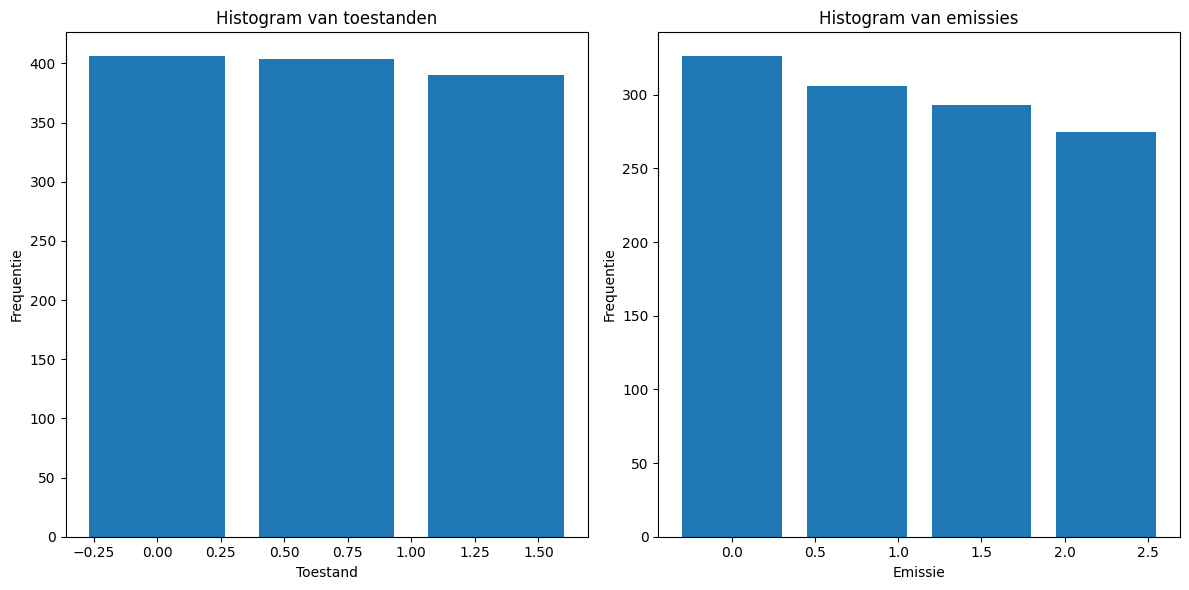

In [32]:
import matplotlib.pyplot as plt
from hmmmodel import HiddenMarkovModel as HMM

n_components = 3 #Hoeveel tafels
n_features = 4 #Hoeveel kleuren
model = HMM(n_components=n_components, n_features=n_features)

model.startprob_ = np.array([1/3, 1/3, 1/3])
model.transmat_ = np.array([
    [1/6, 1/2, 1/3],
    [1/6, 1/3, 1/2],
    [2/3, 1/6, 1/6]
])
model.emissionprob_ = np.array([
    [1/2, 1/4, 1/12, 1/6],
    [1/6, 1/2, 1/6, 1/6],
    [1/12, 0, 1/2, 5/12]
])

emissions, states = model.sample(1200)

print(model)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(states, bins=n_components, align='left', rwidth=0.8)
plt.title('Histogram van toestanden')
plt.xlabel('Toestand')
plt.ylabel('Frequentie')

plt.subplot(1, 2, 2)
plt.hist(emissions, bins=n_features, align='left', rwidth=0.8)
plt.title('Histogram van emissies')
plt.xlabel('Emissie')
plt.ylabel('Frequentie')

plt.tight_layout()
plt.show()

In [33]:
def estimate_transition_matrix(states, n_components):
    counts = np.zeros((n_components, n_components))
    for (i, j) in zip(states[:-1], states[1:]):
        counts[i, j] += 1
    return counts / counts.sum(axis=1, keepdims=True)

def estimate_emission_matrix(states, emissions, n_components, n_features):
    counts = np.zeros((n_components, n_features))
    for state, emission in zip(states, emissions):
        counts[state, emission] += 1
    return counts / counts.sum(axis=1, keepdims=True)

# Schat de overgangs- en emissiematrices
transmat_est = estimate_transition_matrix(states, n_components)
emissionprob_est = estimate_emission_matrix(states, emissions, n_components, n_features)

print("Geschatte overgangsmatrix:")
print(transmat_est)
print("Geschatte emissiematrix:")
print(emissionprob_est)


Geschatte overgangsmatrix:
[[0.16790123 0.48641975 0.34567901]
 [0.20544554 0.33415842 0.46039604]
 [0.65384615 0.18461538 0.16153846]]
Geschatte emissiematrix:
[[0.53694581 0.23152709 0.07635468 0.15517241]
 [0.17079208 0.52475248 0.1509901  0.15346535]
 [0.1        0.         0.51538462 0.38461538]]


CategoricalHMM(n_components=3, n_features=4)


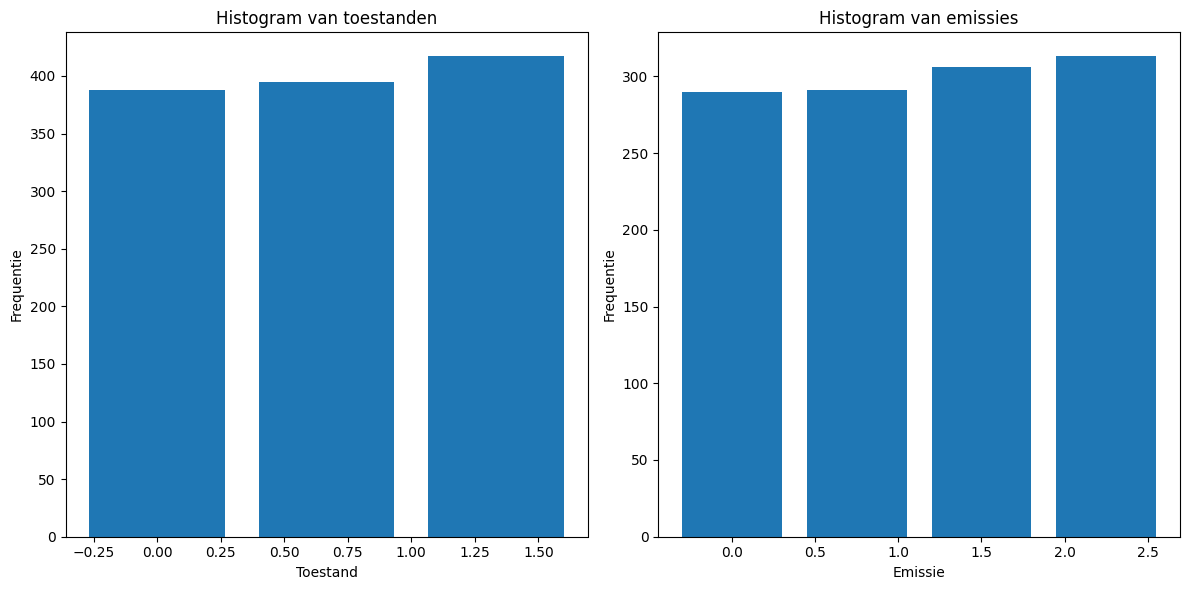

In [ ]:
from hmmlearn.hmm import CategoricalHMM as HMM
n_components = 3 #Hoeveel tafels
n_features = 4 #Hoeveel kleuren
model = HMM(n_components=n_components, n_features=n_features)

model.startprob_ = np.array([1/3, 1/3, 1/3])
model.transmat_ = np.array([
    [1/6, 1/2, 1/3],
    [1/6, 1/3, 1/2],
    [2/3, 1/6, 1/6]
])
model.emissionprob_ = np.array([
    [1/2, 1/4, 1/12, 1/6],
    [1/6, 1/2, 1/6, 1/6],
    [1/12, 0, 1/2, 5/12]
])

emissions, states = model.sample(1200)

print(model)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(states, bins=n_components, align='left', rwidth=0.8)
plt.title('Histogram van toestanden')
plt.xlabel('Toestand')
plt.ylabel('Frequentie')

plt.subplot(1, 2, 2)
plt.hist(emissions, bins=n_features, align='left', rwidth=0.8)
plt.title('Histogram van emissies')
plt.xlabel('Emissie')
plt.ylabel('Frequentie')

plt.tight_layout()
plt.show()

***

&copy; 2024 - Dave R.M. Langers <d.r.m.langers@pl.hanze.nl>